https://www.analyticsvidhya.com/blog/2017/06/a-comprehensive-guide-for-linear-ridge-and-lasso-regression/

Let’s look at the important assumptions in regression analysis:

1) There should be a linear and additive relationship between dependent (response) variable and independent (predictor) variable(s). A linear relationship suggests that a change in response Y due to one unit change in X¹ is constant, regardless of the value of X¹. An additive relationship suggests that the effect of X¹ on Y is independent of other variables.
2) There should be no correlation between the residual (error) terms. Absence of this phenomenon is known as Autocorrelation.
3) The independent variables should not be correlated. Absence of this phenomenon is known as multicollinearity.
4) The error terms must have constant variance. This phenomenon is known as homoskedasticity. The presence of non-constant variance is referred to heteroskedasticity.
5) The error terms must be normally distributed.

In [59]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
from sklearn.model_selection import train_test_split
import os
import matplotlib.pyplot as plt

%matplotlib inline

In [6]:
os.chdir('C:\\Users\\Administrator\\Desktop\\Data\\big mart sales')

In [7]:
train=pd.read_csv('Train_UWu5bXk.csv')

In [9]:
test=pd.read_csv('Test_u94Q5KV.csv')

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
lreg=LinearRegression()

In [12]:
train.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


In [16]:
x=train.loc[:,['Item_MRP','Outlet_Establishment_Year']]

In [17]:
x_train, x_cv, y_train,y_cv=train_test_split(x,train.Item_Outlet_Sales)

In [18]:
lreg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
pred=lreg.predict(x_cv)

In [21]:
mse = np.mean((pred - y_cv)**2)
mse

1963881.40803272

In [26]:
coeff=DataFrame(x_train.columns)

In [27]:
coeff['Estimates']=Series(lreg.coef_)

In [28]:
coeff

,0,Estimates
0,Item_MRP,15.552115
1,Outlet_Establishment_Year,-10.510335


In [32]:
## Rsquare
lreg.score(x_cv,y_cv)*100

32.43564586636033

In [38]:
train['Item_Weight'].fillna((train['Item_Weight'].mean()), inplace=True)

In [39]:
X = train.loc[:,['Outlet_Establishment_Year','Item_MRP','Item_Weight']]

In [40]:
x_train, x_cv, y_train, y_cv = train_test_split(X,train.Item_Outlet_Sales)

In [41]:
lreg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [42]:
pred = lreg.predict(x_cv)

In [44]:
mse = np.mean((pred - y_cv)**2)
mse

2096134.140097242

In [46]:
coeff = DataFrame(x_train.columns)

coeff['Coefficient Estimate'] = Series(lreg.coef_)
coeff

,0,Coefficient Estimate
0,Outlet_Establishment_Year,-9.143674
1,Item_MRP,15.195773
2,Item_Weight,-1.246515


In [48]:
lreg.score(x_cv,y_cv)

0.3438073375701032

##### Using all the features for prediction

In [49]:
train['Item_Visibility'] = train['Item_Visibility'].replace(0,np.mean(train['Item_Visibility']))

In [50]:
train['Outlet_Establishment_Year'] = 2013 - train['Outlet_Establishment_Year']

In [51]:
train['Outlet_Size'].fillna('Small',inplace=True)

##### creating dummy variables to convert categorical into numeric values

In [54]:
mylist = list(train.select_dtypes(include=['object']).columns)
dummies = pd.get_dummies(train[mylist], prefix= mylist)
train.drop(mylist, axis=1, inplace = True)
X = pd.concat([train,dummies], axis =1 )

In [60]:
lreg = LinearRegression()

In [61]:
# for cross validation
from sklearn.model_selection import train_test_split
X = train.drop('Item_Outlet_Sales',1)
x_train, x_cv, y_train, y_cv = train_test_split(X,train.Item_Outlet_Sales, test_size =0.3)

In [62]:
# training a linear regression model on train
lreg.fit(x_train,y_train)
# predicting on cv
pred_cv = lreg.predict(x_cv)
# calculating mse
mse = np.mean((pred_cv - y_cv)**2)
mse

1913180.496134877

In [63]:
# evaluation using r-square
lreg.score(x_cv,y_cv)

0.3676230796805353

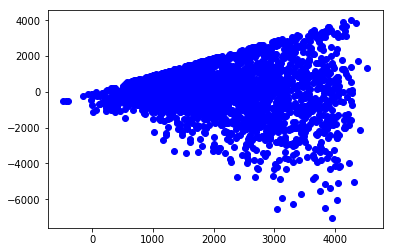

In [64]:
x_plot = plt.scatter(pred_cv, (pred_cv - y_cv), c='b')

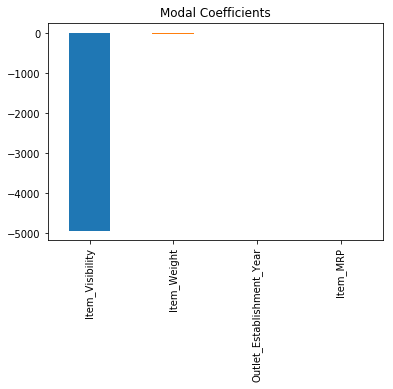

In [65]:
predictors = x_train.columns

coef = Series(lreg.coef_,predictors).sort_values()

coef.plot(kind='bar', title='Modal Coefficients')

In [66]:
from sklearn.linear_model import Ridge

In [67]:
## training the model

ridgeReg = Ridge(alpha=0.05, normalize=True)

ridgeReg.fit(x_train,y_train)

pred = ridgeReg.predict(x_cv)

#calculating mse

mse = np.mean((pred_cv - y_cv)**2)

mse

1913180.496134877

In [68]:
from sklearn.linear_model import Lasso

lassoReg = Lasso(alpha=0.3, normalize=True)

lassoReg.fit(x_train,y_train)

pred = lassoReg.predict(x_cv)

# calculating mse

mse = np.mean((pred_cv - y_cv)**2)

mse


lassoReg.score(x_cv,y_cv)

0.3661036510044525

In [69]:
from sklearn.linear_model import ElasticNet

ENreg = ElasticNet(alpha=1, l1_ratio=0.5, normalize=False)

ENreg.fit(x_train,y_train)

pred_cv = ENreg.predict(x_cv)

#calculating mse

mse = np.mean((pred_cv - y_cv)**2)

mse
ENreg.score(x_cv,y_cv)

0.35285872746010116